In [1]:
# 自动计算cell的计算时间
%load_ext autotime

%matplotlib inline
%config InlineBackend.figure_format='svg' #矢量图设置，让绘图更清晰

time: 274 ms (started: 2021-09-05 13:09:19 +08:00)


In [2]:
%%bash

# 增加更新
git add *.ipynb */*.ipynb

git remote -v

git commit -m '更新 #3 Sept 05, 2021'

#git push origin master
git push

origin	git@github.com:ustchope/pytorch_study.git (fetch)
origin	git@github.com:ustchope/pytorch_study.git (push)
[master aff92ce] 更新 #3 Sept 05, 2021
 4 files changed, 295 insertions(+)
 create mode 100644 "Pytorch_recipes/.ipynb_checkpoints/\344\275\277\347\224\250 PYTORCH \350\277\233\350\241\214\346\267\261\345\272\246\345\255\246\344\271\240-60 \345\210\206\351\222\237\351\227\252\347\224\265\346\210\230-checkpoint.ipynb"
 create mode 100644 "Pytorch_recipes/.ipynb_checkpoints/\345\234\250 PYTORCH \344\270\255\345\212\240\350\275\275\346\225\260\346\215\256-checkpoint.ipynb"
 create mode 100644 "Pytorch_recipes/\344\275\277\347\224\250 PYTORCH \350\277\233\350\241\214\346\267\261\345\272\246\345\255\246\344\271\240-60 \345\210\206\351\222\237\351\227\252\347\224\265\346\210\230.ipynb"
 create mode 100644 "Pytorch_recipes/\345\234\250 PYTORCH \344\270\255\345\212\240\350\275\275\346\225\260\346\215\256.ipynb"


To github.com:ustchope/pytorch_study.git
   9d39e84..aff92ce  master -> master


time: 3.56 s (started: 2021-09-05 13:10:07 +08:00)


PyTorch 具有广泛的神经网络构建块和简单、直观且稳定的 API。 PyTorch 包含用于为您的模型准备和加载通用数据集的包。

# 介绍

PyTorch 数据加载实用程序的核心是 torch.utils.data.DataLoader 类。 它代表一个可迭代数据集的 Python。 PyTorch 中的库提供内置的高质量数据集供您在 torch.utils.data.Dataset 中使用。 这些数据集目前可用于：
* torchvision
* torchaudio
* torchtext

还有更多。 使用来自 torchaudio.datasets.YESNO 的 Yesno 数据集，我们将演示如何有效且高效地将数据从 PyTorch 数据集加载到 PyTorch DataLoader。

# 步骤
* 导入所有必要的库以加载我们的数据
* 访问数据集中的数据
* 加载数据
* 迭代数据
* [可选] 可视化数据

1. 导入必要的库以加载我们的数据

对于这个食谱，我们将使用 torch 和 torchaudio。 根据您使用的内置数据集，您还可以安装和导入 torchvision 或 torchtext。

In [3]:
import torch
import torchaudio

time: 817 ms (started: 2021-09-05 13:16:52 +08:00)


2. 访问数据集中的数据

torchaudio 中的 Yesno 数据集包含 60 个记录，其中一个人用希伯来语说是或否； 每个录音的长度为 8 个字（在此处阅读更多内容）。

torchaudio.datasets.YESNO 为 YesNo 创建数据集。

In [ ]:
torchaudio.datasets.YESNO(
     root,
     url='http://www.openslr.org/resources/1/waves_yesno.tar.gz',
     folder_in_archive='waves_yesno',
     download=False,
     transform=None,
     target_transform=None)

数据集中的每一项都是以下形式的元组：(waveform, sample_rate, labels)。

您必须为 Yesno 数据集设置一个根，这是训练和测试数据集所在的位置。 其他参数是可选的，显示了它们的默认值。 以下是有关其他参数的一些其他有用信息：

In [5]:
# * ``download``: If true, downloads the dataset from the internet and puts it in root directory. If dataset is already downloaded, it is not downloaded again.
# * ``transform``: Using transforms on your data allows you to take it from its source state and transform it into data that’s joined together, de-normalized, and ready for training. Each library in PyTorch supports a growing list of transformations.
# * ``target_transform``: A function/transform that takes in the target and transforms it.
#
# Let’s access our Yesno data:
#

# A data point in Yesno is a tuple (waveform, sample_rate, labels) where labels
# is a list of integers with 1 for yes and 0 for no.
yesno_data = torchaudio.datasets.YESNO('./', download=True)

# Pick data point number 3 to see an example of the the yesno_data:
n = 3
waveform, sample_rate, labels = yesno_data[n]
print("Waveform: {}\nSample rate: {}\nLabels: {}".format(waveform, sample_rate, labels))

  0%|          | 0.00/4.49M [00:00<?, ?B/s]

Waveform: tensor([[ 3.0518e-05,  6.1035e-05,  3.0518e-05,  ..., -1.8311e-04,
          4.2725e-04,  6.7139e-04]])
Sample rate: 8000
Labels: [0, 0, 1, 0, 0, 0, 1, 0]
time: 20.4 s (started: 2021-09-05 13:18:30 +08:00)


在实践中使用此数据时，最佳做法是将数据提供到“训练”数据集和“测试”数据集。 这可确保您拥有样本外数据来测试模型的性能。

3. 加载数据

现在我们可以访问数据集，我们必须通过 torch.utils.data.DataLoader 传递它。 DataLoader 将数据集和采样器组合在一起，返回数据集上的可迭代对象。

In [6]:
data_loader = torch.utils.data.DataLoader(yesno_data,
                                          batch_size=1,
                                          shuffle=True)

time: 1.89 ms (started: 2021-09-05 13:19:23 +08:00)


4. 迭代数据

我们的数据现在可以使用 data_loader 进行迭代。 当我们开始训练我们的模型时，这将是必要的！ 您会注意到，现在 data_loader 对象中的每个数据条目都被转换为一个张量，其中包含代表我们的波形、采样率和标签的张量。

In [7]:
for data in data_loader:
  print("Data: ", data)
  print("Waveform: {}\nSample rate: {}\nLabels: {}".format(data[0], data[1], data[2]))
  break

Data:  [tensor([[[-3.0518e-05,  3.0518e-05,  3.0518e-05,  ..., -1.7395e-03,
          -4.0283e-03, -5.0964e-03]]]), tensor([8000]), [tensor([1]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0])]]
Waveform: tensor([[[-3.0518e-05,  3.0518e-05,  3.0518e-05,  ..., -1.7395e-03,
          -4.0283e-03, -5.0964e-03]]])
Sample rate: tensor([8000])
Labels: [tensor([1]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0]), tensor([0])]
time: 12.1 ms (started: 2021-09-05 13:20:10 +08:00)


5. [可选] 可视化数据

您可以选择可视化您的数据，以进一步了解您的 DataLoader 的输出。

[[-3.0517578e-05  3.0517578e-05  3.0517578e-05 ... -1.7395020e-03
  -4.0283203e-03 -5.0964355e-03]]


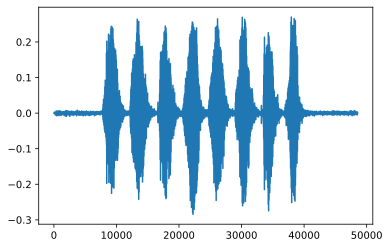

time: 131 ms (started: 2021-09-05 13:21:14 +08:00)


In [9]:
import matplotlib.pyplot as plt

print(data[0][0].numpy())

plt.figure()
plt.plot(waveform.T.numpy())

恭喜！ 您已成功在 PyTorch 中加载数据。